<a href="https://colab.research.google.com/github/ai-pallikoodam/pytorch-home/blob/main/02_Exer_Vision_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -Uqq torch timm fastai gradio

     |████████████████████████████████| 776.3 MB 12 kB/s 
     |████████████████████████████████| 509 kB 41.8 MB/s 
     |████████████████████████████████| 225 kB 72.4 MB/s 


In [3]:
from fastai.vision.all import *
import gradio as gr
import timm

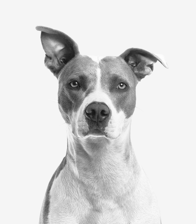

In [6]:
im = PILImage.create('grey-dog.jpeg')
im.thumbnail((224, 224))
im

In [ ]:
# from google.colab import drive
# drive.mount('/content/')

learn = load_learner('/content/model.pkl')
learn.predict(im)

In [ ]:
categories = learn.dls.vocab

In [ ]:
def classify_images(img):
	pred, idx, probs = learn.predict(img)
	return dict(zip(categories, map(float, probs)))

In [ ]:
classify_images

In [ ]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
example = ['grey-dog.jpeg']

In [ ]:
intf = gr.Interface(fn=classify_images, inputs=image, output=lables, examples=examples)
intf.launch(inline=False)

In [ ]:
m = learn.model
m

In [ ]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())